In [1]:
import geopandas as gpd
import pandas as pd

In [24]:
#Tennessee buildings geojson from Microsoft Buildings github 
#can be downloaded here: https://usbuildingdata.blob.core.windows.net/usbuildings-v2/Tennessee.geojson.zip
builds = gpd.read_file('../data/Tennessee.geojson')

In [2]:
# COUNTY = '037'
COUNTY = '187'

In [3]:
#input the cbgs and filter for Hamilton county
state_cbg = gpd.read_file('../data/Tennessee Census Block Groups/tl_2020_47_bg.shp')
county_cbg = state_cbg[state_cbg['COUNTYFP']==COUNTY].reset_index(drop=True)
county_cbg.GEOID = county_cbg.GEOID.astype(str)
county_cbg = county_cbg.to_crs('epsg:4326')

In [15]:
type(county_cbg[['GEOID', 'geometry']])

geopandas.geodataframe.GeoDataFrame

In [25]:
#choosing buildings only in Hamilton county
county_builds = builds.sjoin(county_cbg[['GEOID', 'geometry']])

In [26]:
county_builds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
county_builds.reset_index(drop=True).head()

,release,capture_dates_range,geometry,index_right,GEOID
0,2,2/14/2020-3/1/2020,"POLYGON ((-86.61383 35.85908, -86.61382 35.859...",80,471870501032
1,2,2/14/2020-3/1/2020,"POLYGON ((-86.61444 35.85377, -86.61443 35.853...",80,471870501032
2,2,2/14/2020-3/1/2020,"POLYGON ((-86.61513 35.88696, -86.61513 35.886...",80,471870501032
3,2,2/14/2020-3/1/2020,"POLYGON ((-86.61717 35.87030, -86.61730 35.870...",80,471870501032
4,2,2/14/2020-3/1/2020,"POLYGON ((-86.62929 35.86243, -86.62915 35.862...",80,471870501032


In [28]:
#fidning center of buildings from MS building footprints which are usually Polygons
county_builds['geo_centers'] = county_builds.geometry.centroid

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [22]:
county_builds = pd.read_csv('../out_Williamson/county_buildings_MS.csv')
county_builds2 = gpd.GeoDataFrame(county_builds)

In [23]:
county_builds2.head()

,release,capture_dates_range,geometry,index_right,GEOID,geo_centers,location
0,2,2/14/2020-3/1/2020,"POLYGON ((-86.613829 35.859078, -86.6138190000...",80,471870501032,POINT (-86.61396500000001 35.8591455),"[35.8591455, -86.61396500000001]"
1,2,2/14/2020-3/1/2020,"POLYGON ((-86.61444400000001 35.853775, -86.61...",80,471870501032,POINT (-86.6144928738364 35.85381922004357),"[35.85381922004357, -86.6144928738364]"
2,2,2/14/2020-3/1/2020,"POLYGON ((-86.615127 35.886962, -86.6151250000...",80,471870501032,POINT (-86.61500039542967 35.88690758681881),"[35.88690758681881, -86.61500039542967]"
3,2,2/14/2020-3/1/2020,"POLYGON ((-86.617166 35.870304, -86.6172980000...",80,471870501032,POINT (-86.617278 35.8702585),"[35.8702585, -86.617278]"
4,2,2/14/2020-3/1/2020,"POLYGON ((-86.629295 35.862434, -86.629155 35....",80,471870501032,POINT (-86.62919050963833 35.86260608575525),"[35.86260608575525, -86.62919050963833]"


In [29]:
county_builds.head()

,release,capture_dates_range,geometry,index_right,GEOID,geo_centers
68253,2,2/14/2020-3/1/2020,"POLYGON ((-86.61383 35.85908, -86.61382 35.859...",80,471870501032,POINT (-86.61397 35.85915)
68301,2,2/14/2020-3/1/2020,"POLYGON ((-86.61444 35.85377, -86.61443 35.853...",80,471870501032,POINT (-86.61449 35.85382)
68391,2,2/14/2020-3/1/2020,"POLYGON ((-86.61513 35.88696, -86.61513 35.886...",80,471870501032,POINT (-86.61500 35.88691)
68467,2,2/14/2020-3/1/2020,"POLYGON ((-86.61717 35.87030, -86.61730 35.870...",80,471870501032,POINT (-86.61728 35.87026)
68903,2,2/14/2020-3/1/2020,"POLYGON ((-86.62929 35.86243, -86.62915 35.862...",80,471870501032,POINT (-86.62919 35.86261)


<AxesSubplot:>

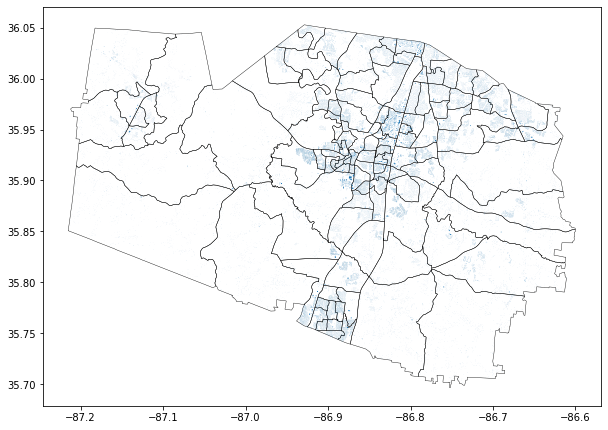

In [30]:
ax=county_cbg.plot(figsize=(10, 10), color='None', edgecolor="black", linewidth=0.4)
county_builds.geometry.plot(figsize=(10, 10), ax=ax, markersize=0.1)

In [8]:
county_builds['location'] = county_builds.geo_centers.apply(lambda p: [p.y, p.x])

In [9]:
county_builds.to_csv('../data/county_buildings_MS.csv', index=False)